In [1]:
import torch

In [2]:
# Polynomial parameters
alphas = torch.nn.Parameter(torch.randn(5))
alphas

Parameter containing:
tensor([ 0.1307,  1.1939, -0.7325,  2.2855,  0.0610], requires_grad=True)

In [3]:
# Interpolation points
x = torch.linspace(0, 2, 5)
y = torch.exp(x)
print(x, y)

tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000]) tensor([1.0000, 1.6487, 2.7183, 4.4817, 7.3891])


In [4]:
def create_polynomial_vector(x):
    # Create a vector [x^4, x^3, x^2, x^1, x^0]
    powers = torch.arange(4, -1, -1, dtype=torch.float32)
    polynomial_vector = x ** powers

    return polynomial_vector

In [9]:
num_iterations = 30000
optimizer = torch.optim.SGD([alphas], lr=1e-3)

In [10]:
loss_list = []
for i in range(num_iterations):
    # Compute loss function (MSE)
    z = torch.tensor(0., requires_grad = False)
    for k in range(5):
        z += torch.square(torch.sum(torch.mul(alphas, create_polynomial_vector(x[k]))) - y[k])
    z = torch.sqrt(torch.sum(z))

    # Store loss
    loss_list += [z.item()]

    # Update parameters
    z.backward()
    optimizer.step()
    optimizer.zero_grad()

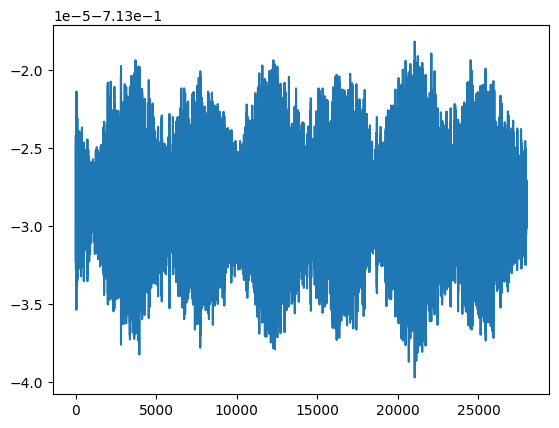

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.log10(loss_list[2000:]))

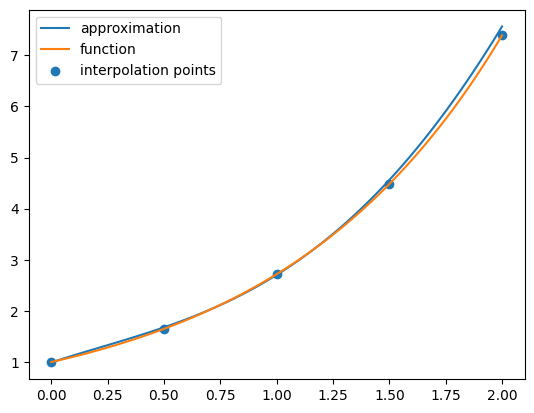

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x_np = np.linspace(0, 2, 100)
a = alphas.detach().numpy()
plt.plot(x_np, a[0] * x_np ** 4 + a[1] * x_np ** 3 + a[2] * x_np ** 2 + a[3] * x_np ** 1 + a[4], label = "approximation")
plt.plot(x_np, np.exp(x_np), label = "function")
plt.scatter(x.detach().numpy(), y.detach().numpy(), label = "interpolation points")
plt.legend()